In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## reading data

In [23]:
car_data = pd.read_csv('../data/raw/car_raw.csv', index_col=0)
print(car_data.shape)
car_data.head()

(2948, 11)


,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city,location_state
2310,Porsche Macan 3.6 Turbo,265000000,https://carro.mercadolibre.com.co/MCO-14019929...,2015,31171,2024-03-13,Porsche,Macan,1401992975,Usaquén,Bogotá D.C.
2311,Volkswagen Bora 2.5 Exclusive,33000000,https://carro.mercadolibre.com.co/MCO-22598732...,2009,153000,2024-03-13,Volkswagen,Bora,2259873206,Suba,Bogotá D.C.
2312,Ford Fiesta 1.6 Hatchback Mecánica,36000000,https://carro.mercadolibre.com.co/MCO-14020825...,2012,62142,2024-03-13,Ford,Fiesta,1402082557,Suba,Bogotá D.C.
2313,Renault Duster 2.0 Dynamique 4x4,73000000,https://carro.mercadolibre.com.co/MCO-14020174...,2021,23104,2024-03-13,Renault,Duster,1402017441,Usaquén,Bogotá D.C.
2314,Toyota Rav4 2.5,180890000,https://carro.mercadolibre.com.co/MCO-14020422...,2021,35200,2024-03-13,Toyota,Rav4,1402042245,Suba,Bogotá D.C.


<Axes: xlabel='vehicle_make'>

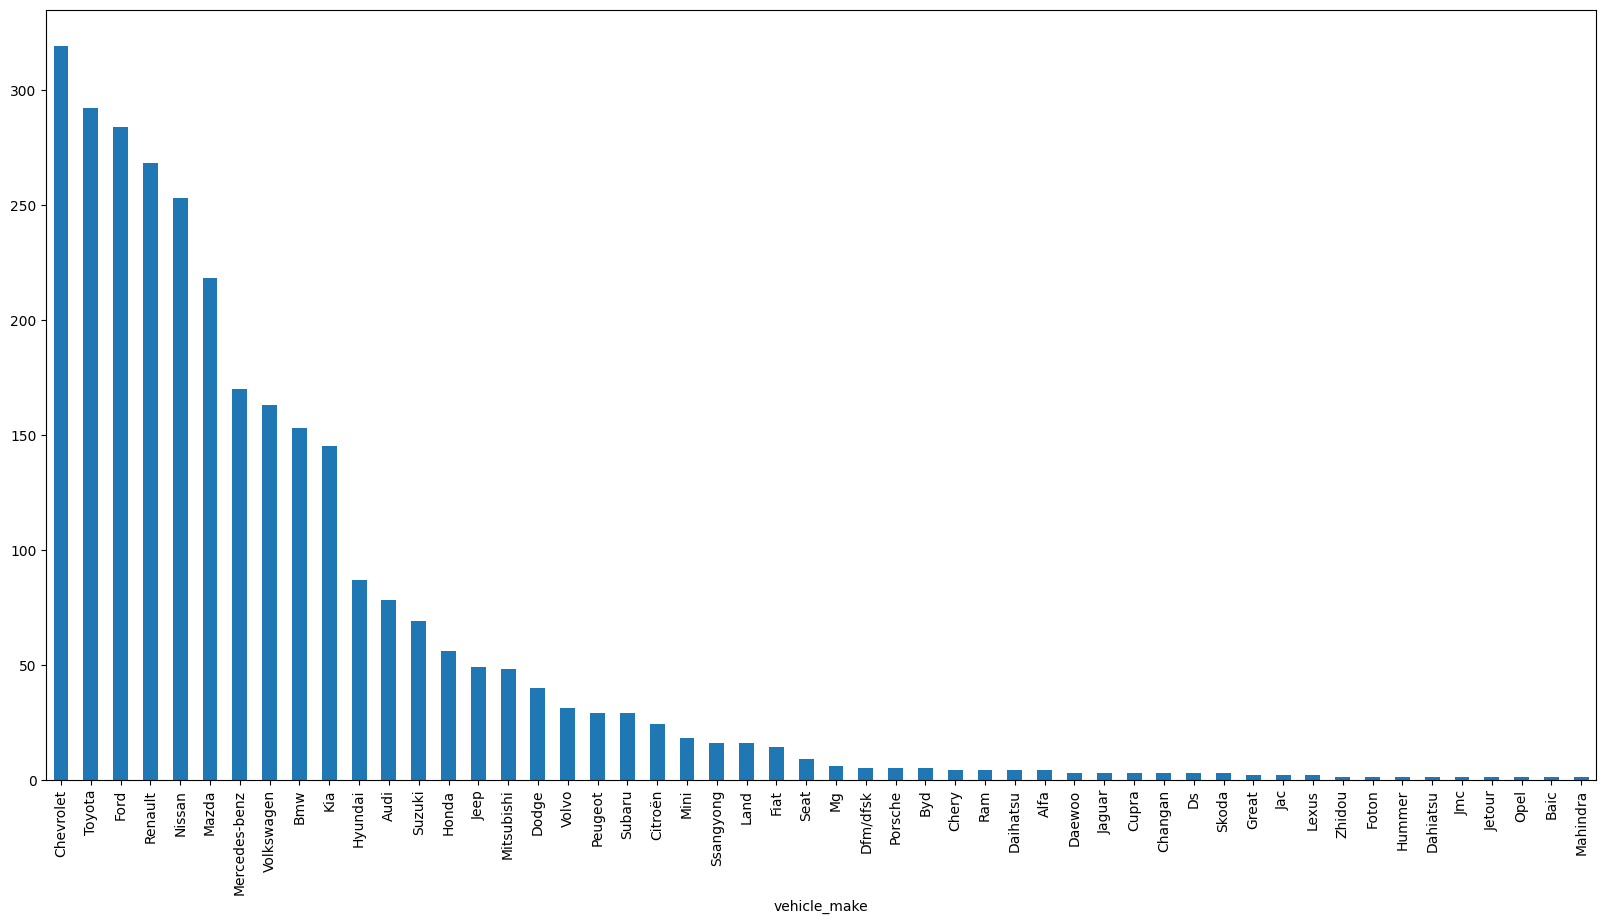

In [28]:
plt.figure(figsize=(20,10))
car_data['vehicle_make'].value_counts().plot(kind='bar')

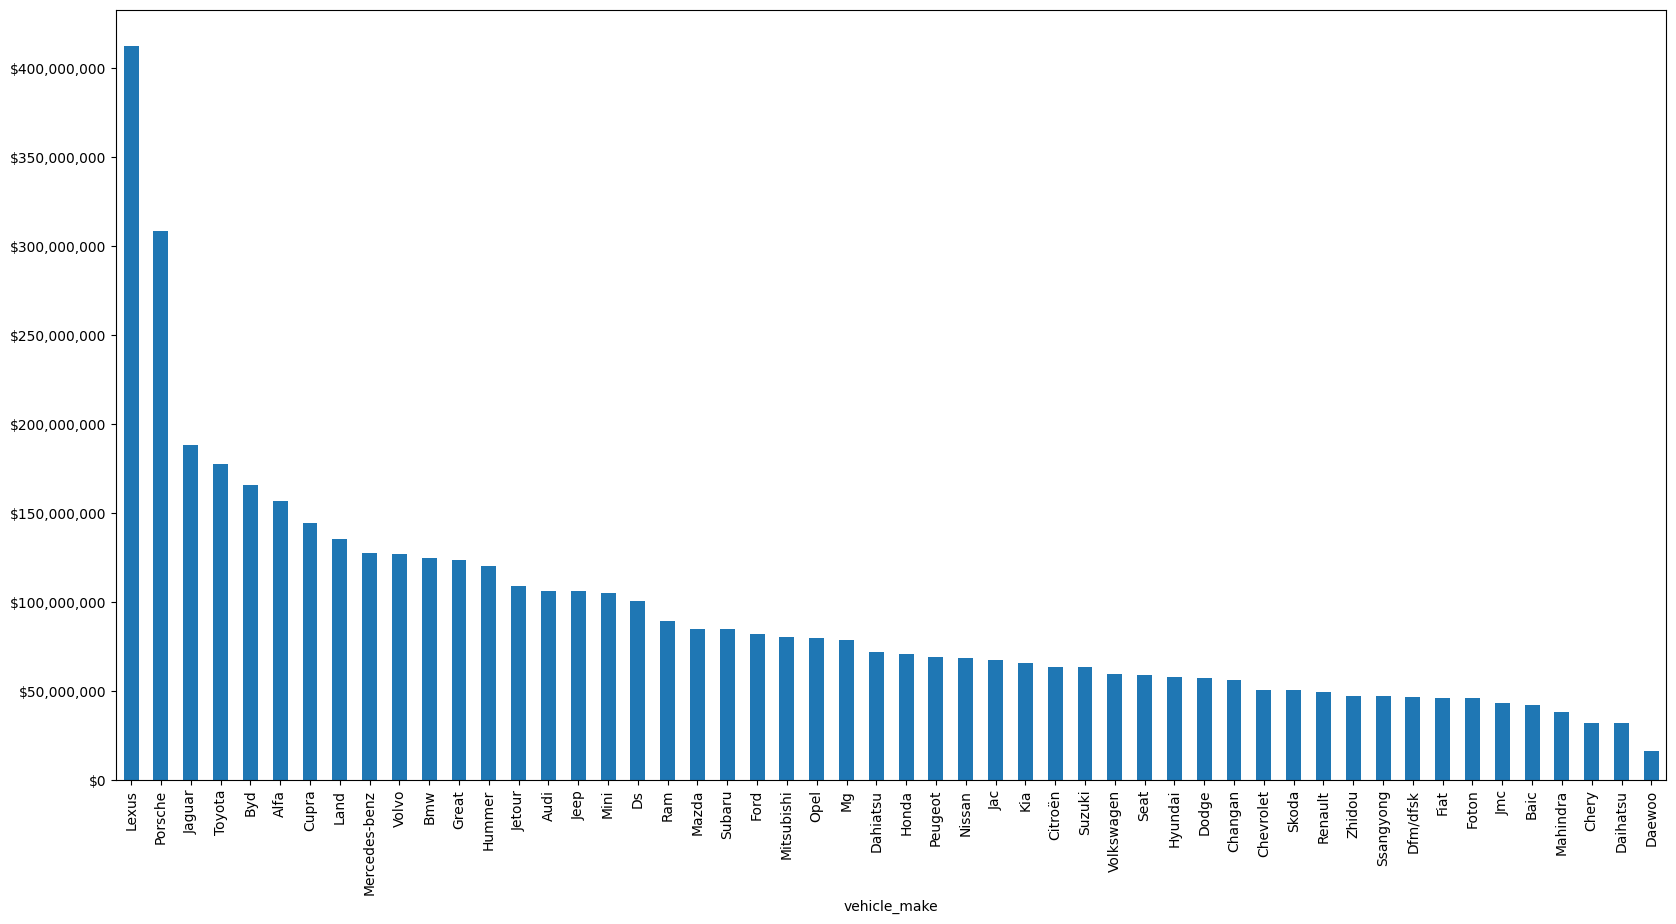

In [42]:


# Suponiendo que car_data es tu DataFrame y ya has agrupado y ordenado los datos como mencionaste
plt.figure(figsize=(20,10))
ax = car_data.groupby('vehicle_make')['price'].mean().sort_values(ascending=False).plot(kind='bar')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

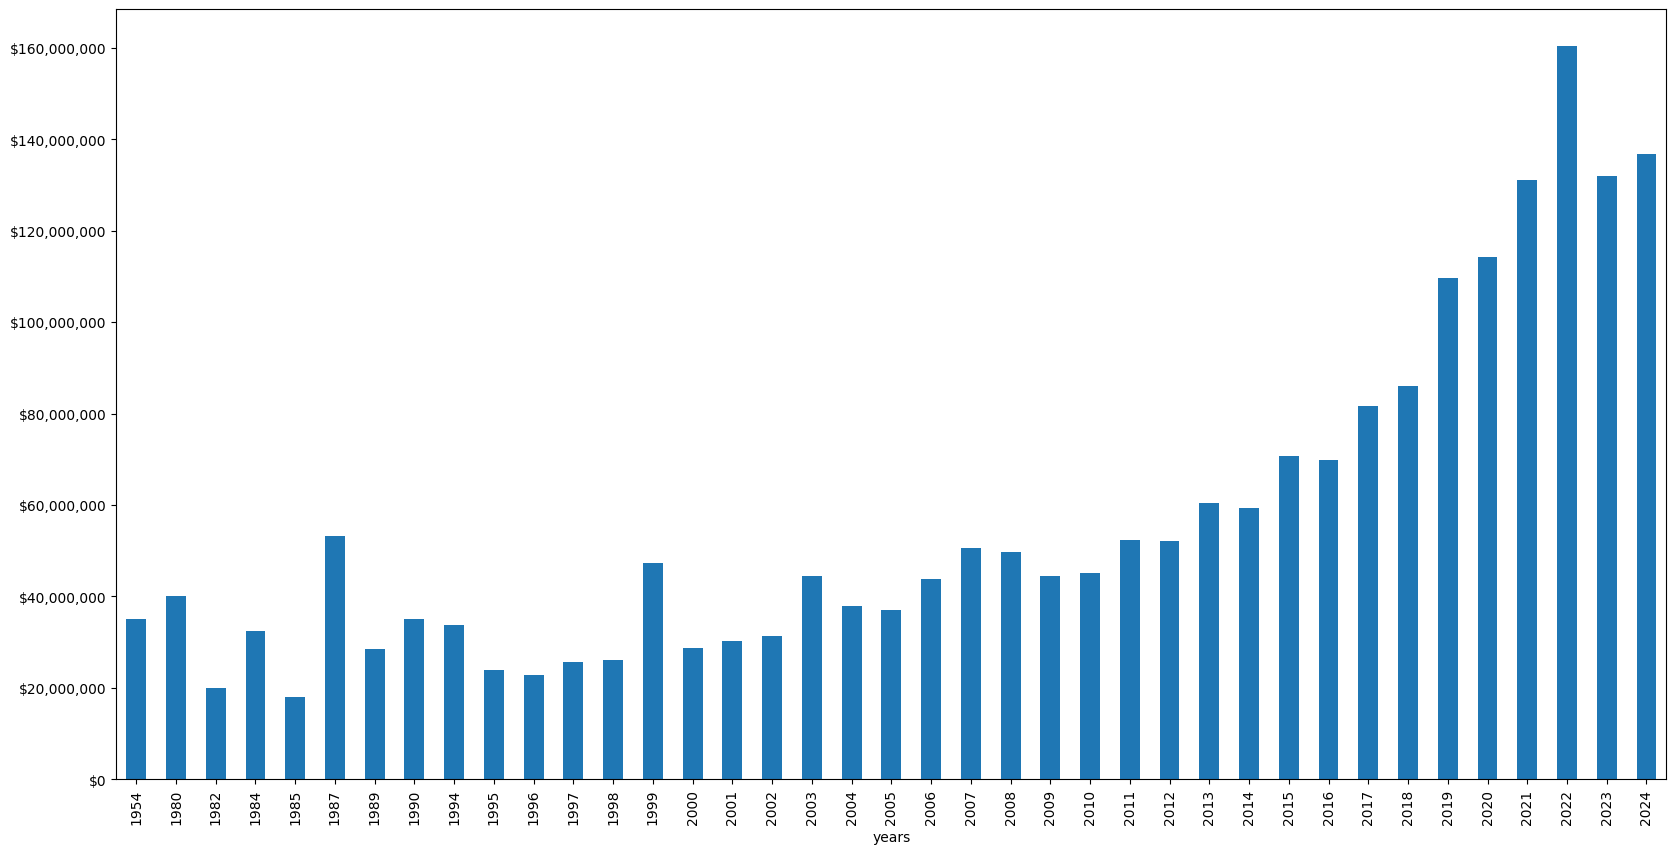

In [43]:
plt.figure(figsize=(20,10))
ax = car_data.groupby('years')['price'].mean().plot(kind='bar')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

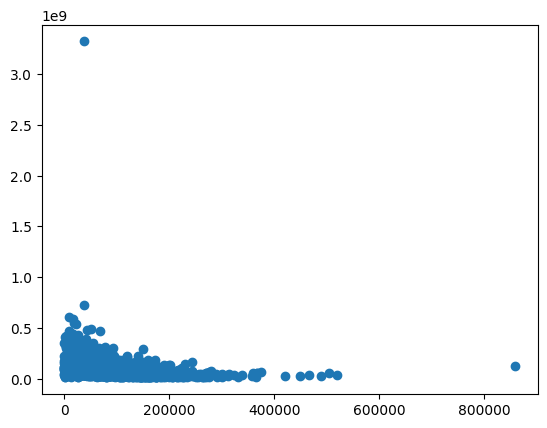

In [45]:
plt.scatter(x=car_data['kilometraje'], y=car_data['price'])

In [78]:
car_data['price'].replace(3320000000, 320000000, inplace=True)
car_data['price'].replace(730000000, 71000000, inplace=True)

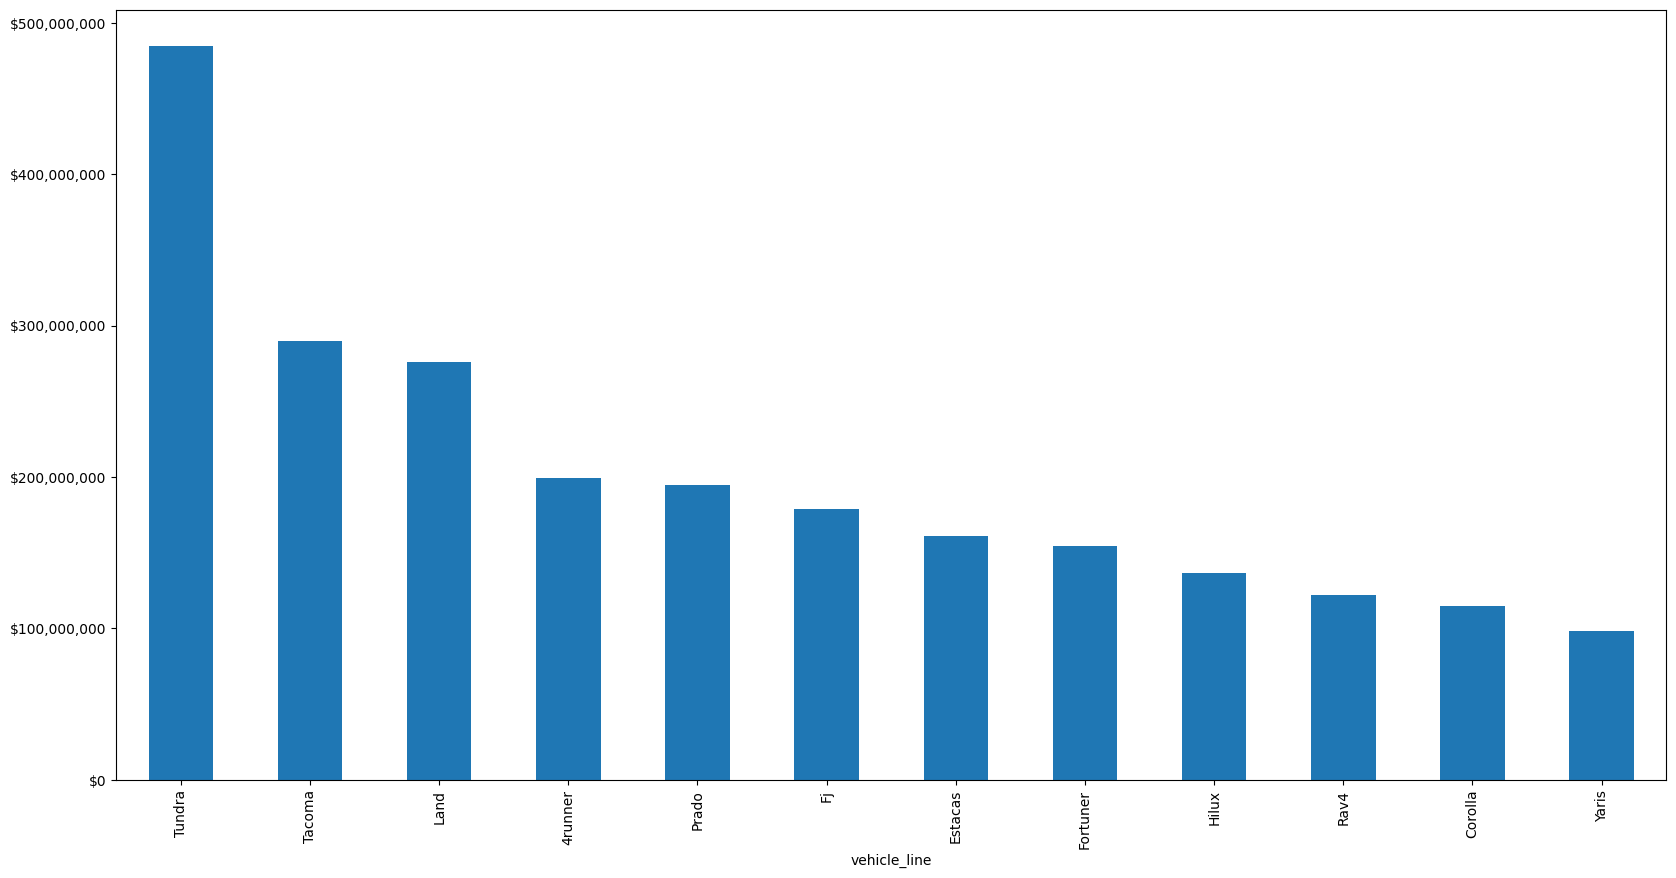

In [79]:
# Suponiendo que car_data es tu DataFrame y ya has agrupado y ordenado los datos como mencionaste
plt.figure(figsize=(20,10))
ax = car_data[car_data['vehicle_make']=='Toyota'].groupby('vehicle_line')['price'].mean().sort_values(ascending=False).plot(kind='bar')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

In [80]:
car_data['price'].max()

605000000

In [91]:
car_data[car_data['vehicle_make']=='Lexus'].loc[4337]['link']

'https://carro.mercadolibre.com.co/MCO-2202221242-lexus-gx-460-premium-_JM#position=5&search_layout=grid&type=item&tracking_id=6f405ec0-0962-4835-a3fc-d185003a3d53'

In [85]:
car_data[car_data['price'] == car_data['price'].max()]['link'].values

array(['https://carro.mercadolibre.com.co/MCO-1388775475-lexus-lx-57-570-super-sport-s-4x4-2019-_JM#position=12&search_layout=grid&type=item&tracking_id=a4a4062b-04a1-4a2b-ad76-25ede8326b29'],
      dtype=object)